<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_04/class_004_image_processing_smart_trash_bin_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import random
import zipfile
from matplotlib import pyplot as plt
import skimage.feature
from string import digits
import seaborn as sns
import skimage
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
!gdown 1L4mdCDBgybKqr5Wo-kqT8HXcBJ9HXqSX

Downloading...
From: https://drive.google.com/uc?id=1L4mdCDBgybKqr5Wo-kqT8HXcBJ9HXqSX
To: /content/trash_nov_22_2018.zip
100% 42.8M/42.8M [00:00<00:00, 63.5MB/s]


In [4]:
FILE='trash_nov_22_2018.zip'

In [5]:
archive = zipfile.ZipFile('trash_nov_22_2018.zip', 'r')
archive.extractall()

In [6]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [7]:
Img_Size = 200
ref = 'jpg'
notref = 'met'

In [8]:
X= []  
Y =[]
n = len(img_name)
i = 0
for i in range(n):
  name = img_name[i]
  if(ref in name):
    Y.append(name)
    img = cv2.imread(name)
    resized = cv2.resize(img, (Img_Size,Img_Size))
    X.append(resized)
m = len(Y)
print(n,m)

2527 2527


In [9]:
n =len(img_name)
tipos = []
selected = 'find'
for x in img_name:
  result =''.join([i for i in x[:-4] if not i.isdigit()])
  if(result != selected):
    selected = result
    tipos.append(selected)


In [10]:
label =[]
for name in img_name:
  for idx, x in enumerate(tipos):
    if(x in name):
      label.append(idx)

In [11]:
df=pd.DataFrame(label,columns=['target'])

In [12]:
for i in range(6): 
  df_plot= df[(df["target"] == i)]
  n= df_plot.shape[0]
  print(tipos[i],n)

cardboard 403
glass 501
metal 410
paper 594
plastic 482
trash 137


In [13]:
y = pd.get_dummies(df['target'])
# check https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
y

,0,1,2,3,4,5
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
2522,0,0,0,0,0,1
2523,0,0,0,0,0,1
2524,0,0,0,0,0,1
2525,0,0,0,0,0,1


In [14]:
DATASET_SIZE = len(img_name)
Ind = range(DATASET_SIZE)
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20,stratify=label, shuffle=True, random_state=3)

In [15]:
X = np.array(X)
X_train=X[Ind_train]
X_test = X[Ind_test]
y_train=y.iloc[Ind_train,:]
y_test = y.iloc[Ind_test,:]

In [16]:
X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0

In [17]:
# cnn check
# https://www.ibm.com/cloud/learn/convolutional-neural-networks
# https://www.tensorflow.org/tutorials/images/cnn

In [18]:
K = y.shape[1]
model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=80))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


In [19]:


model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, y_train, epochs=1000, batch_size=64)
print("Returned:", r)

Epoch 1/1000
32/32 [==============================] - 15s 149ms/step - loss: 3.8444 - accuracy: 0.2143
Epoch 2/1000
32/32 [==============================] - 4s 125ms/step - loss: 1.7186 - accuracy: 0.2746
Epoch 3/1000
32/32 [==============================] - 4s 125ms/step - loss: 1.6813 - accuracy: 0.2677
Epoch 4/1000
32/32 [==============================] - 4s 125ms/step - loss: 1.6092 - accuracy: 0.3028
Epoch 5/1000
32/32 [==============================] - 4s 125ms/step - loss: 1.5709 - accuracy: 0.3286
Epoch 6/1000
32/32 [==============================] - 4s 124ms/step - loss: 1.5588 - accuracy: 0.3380
Epoch 7/1000
32/32 [==============================] - 4s 125ms/step - loss: 1.5020 - accuracy: 0.4008
Epoch 8/1000
32/32 [==============================] - 4s 126ms/step - loss: 1.4840 - accuracy: 0.4142
Epoch 9/1000
32/32 [==============================] - 4s 126ms/step - loss: 1.4163 - accuracy: 0.4102
Epoch 10/1000
32/32 [==============================] - 4s 127ms/step - loss: 1.41

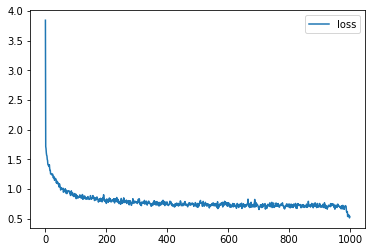

In [21]:
# plot some data
plt.plot(r.history['loss'], label='loss')
#plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

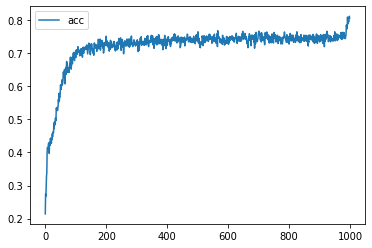

In [22]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
#plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [23]:
def retorna(y):
  resp = []
  for yi in y:
    vmax =max(yi)
    for idx, x in enumerate(yi):
      if(x == vmax):
        resp.append(idx)
  return resp

In [24]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


16/16 - 1s - loss: 6.6061 - accuracy: 0.6265 - 1s/epoch - 63ms/step


In [25]:
pd.__version__

'1.3.5'

In [26]:
predict=model.predict(X_test) 

In [27]:
y_calc = retorna(predict)
y_test = retorna(np.array(y_test))

In [28]:
confusion_matrix(y_test, y_calc)

array([[55,  3,  7,  7,  9,  0],
       [ 1, 60, 29,  1,  9,  0],
       [ 6,  9, 53,  4, 10,  0],
       [ 4,  1, 20, 92,  2,  0],
       [ 8, 15, 15,  2, 57,  0],
       [ 7,  1,  3,  1, 15,  0]])

In [29]:
# Classification Report
print('\n\n', classification_report(y_test, y_calc, target_names=tipos))



               precision    recall  f1-score   support

   cardboard       0.68      0.68      0.68        81
       glass       0.67      0.60      0.63       100
       metal       0.42      0.65      0.51        82
       paper       0.86      0.77      0.81       119
     plastic       0.56      0.59      0.57        97
       trash       0.00      0.00      0.00        27

    accuracy                           0.63       506
   macro avg       0.53      0.55      0.53       506
weighted avg       0.62      0.63      0.62       506



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# Classification Report
print('\n\n', classification_report(y_test, y_test, target_names=tipos))



               precision    recall  f1-score   support

   cardboard       1.00      1.00      1.00        81
       glass       1.00      1.00      1.00       100
       metal       1.00      1.00      1.00        82
       paper       1.00      1.00      1.00       119
     plastic       1.00      1.00      1.00        97
       trash       1.00      1.00      1.00        27

    accuracy                           1.00       506
   macro avg       1.00      1.00      1.00       506
weighted avg       1.00      1.00      1.00       506

